In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


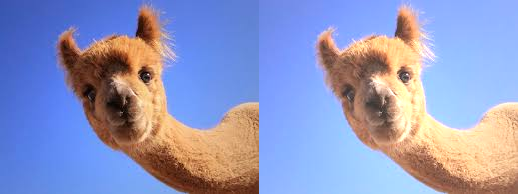

In [12]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/images.jpeg')
brightness_image = np.zeros(original.shape, original.dtype)

#akases per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

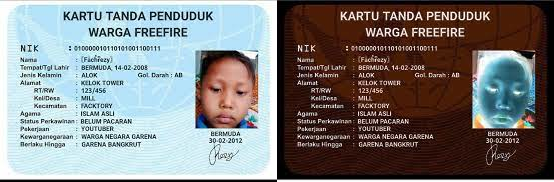

In [26]:
ktp = cv.imread('/content/drive/MyDrive/ktp.jpeg')
inverted_image = 255 - ktp
final_frame = cv.hconcat((ktp, inverted_image))
cv2_imshow(final_frame)

Mengubah tingkat kontras citra
------------------------------
Masukkan kontras [1.0 - 3.0]: 2


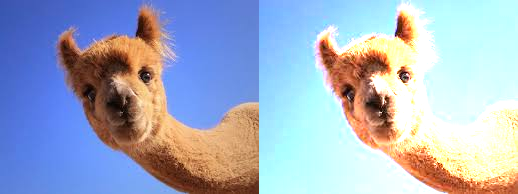

In [22]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

print('Mengubah tingkat kontras citra')
print('------------------------------')
try:
    kontras = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
    print('Error, bukan angka')

original = cv.imread('/content/drive/MyDrive/images.jpeg')
kontras_image = np.zeros(original.shape, original.dtype)

# Akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            kontras_image[y, x, c] = np.clip(original[y, x, c] * kontras, 0, 255)

final_frame = cv.hconcat((original, kontras_image))
cv2_imshow(final_frame)


Mengubah tingkat kecerahan citra dengan transformasi log
------------------------------------------------------------
Masukkan nilai kecerahan: 50


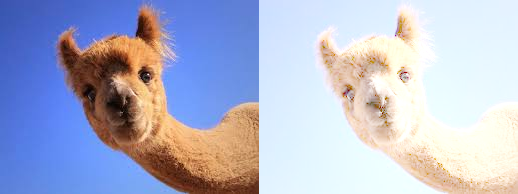

In [33]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import math

print('Mengubah tingkat kecerahan citra dengan transformasi log')
print('------------------------------------------------------------')
try:
    brightness = float(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, bukan angka')

original = cv.imread('/content/drive/MyDrive/images.jpeg')
brightness_image = np.zeros(original.shape, original.dtype)

# Transformasi logaritmik
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y, x, c] = np.clip(brightness * (np.log(1 + original[y,x,c])), 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)


Transformasi Citra ke Grayscale
--------------------------------


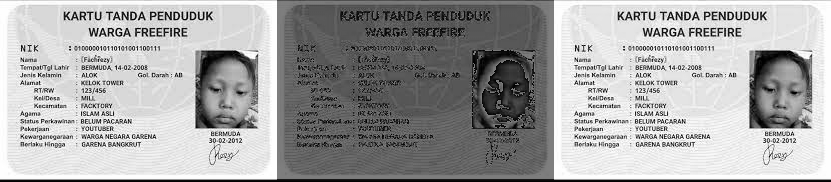

In [45]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

print('Transformasi Citra ke Grayscale')
print('--------------------------------')

ktp = cv.imread('/content/drive/MyDrive/ktp.jpeg')

grayscale_averaging = cv.cvtColor(ktp, cv.COLOR_BGR2GRAY)

grayscale_lightness = np.uint8((np.max(ktp, axis=2) + np.min(ktp, axis=2)) / 2)

grayscale_luminance = np.uint8(0.07 * ktp[:, :, 2] + 0.72 * ktp[:, :, 1] + 0.21 * ktp[:, :, 0])

final_frame = cv.hconcat((grayscale_averaging, grayscale_lightness, grayscale_luminance))
cv2_imshow(final_frame)


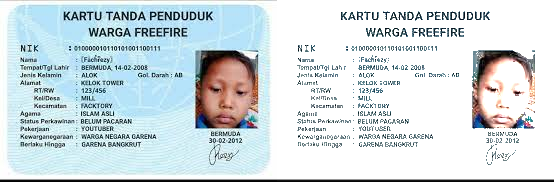

In [62]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

# Membaca citra
original = cv.imread('/content/drive/MyDrive/ktp.jpeg')

# Tentukan batas warna biru dalam format BGR
lower_blue = np.array([100, 0, 0], dtype=np.uint8)
upper_blue = np.array([200, 160, 160], dtype=np.uint8)

# Buat citra mask hanya dengan warna biru yang akan diambil
mask = cv.inRange(original, lower_blue, upper_blue)

# Ubah bagian yang bukan warna biru menjadi grayscale
grayscale_image = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
grayscale_image = cv.cvtColor(grayscale_image, cv.COLOR_GRAY2BGR)
masked_image = cv.bitwise_and(grayscale_image, grayscale_image, mask=255 - mask)

# Gabungkan citra asli dan citra hasil
result_image = cv.add(masked_image, original)

final_frame = cv.hconcat((original,result_image))
cv2_imshow(final_frame)